In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

N,n_steps,n_analyze,flip_perc
100,150000,5000,0.1


In [33]:
em = pd.read_csv("best_large_run/0.00T5.00_EM_v0.csv")

In [34]:
em

,Temp,E_mean,E_std,M_mean,M_std
0,0.000,-2.000000,0.000000,1.000000,0.000000
1,0.005,-2.000000,0.000000,1.000000,0.000000
2,0.010,-2.000000,0.000000,1.000000,0.000000
3,0.015,-2.000000,0.000000,1.000000,0.000000
4,0.020,-2.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...
994,4.975,-0.378266,0.015127,0.000345,0.016239
995,4.980,-0.376088,0.015376,-0.000546,0.014546
996,4.985,-0.377153,0.015382,0.001472,0.015729
997,4.990,-0.376032,0.015681,-0.002101,0.015805


In [35]:
em= em[1:]

## Heat Capacity

$$
c_v = \frac{k}{T^2} Var{E}
$$

set $\beta=1$
$$
c_v = \frac{1}{T} Var{E}
$$

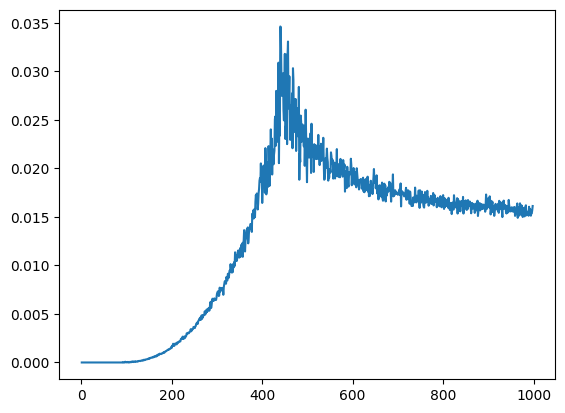

In [41]:
plt.plot(em["E_std"])

In [57]:
def error(X, k = 0.001):
    return 0.25*X*np.exp(k)

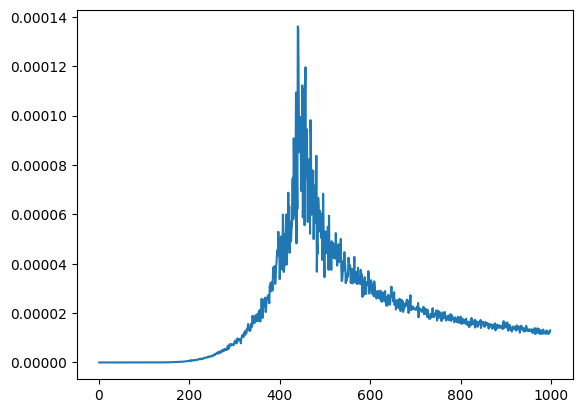

In [58]:
plt.plot(error(get_cv(em)))

In [59]:
def get_cv(data):

    cv = 1/data["Temp"] * data["E_std"]**2
    return cv

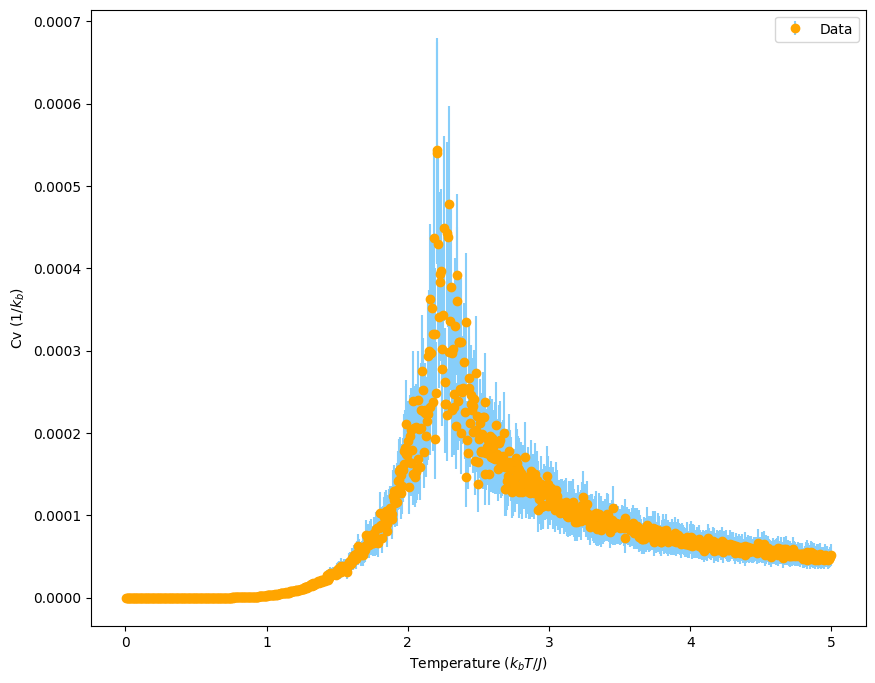

In [63]:
fig = plt.figure(figsize= (10, 8))
plt.errorbar(em["Temp"], get_cv(em), yerr = error(get_cv(em)),fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data")

plt.xlabel("Temperature ($k_bT/J$)")
plt.ylabel("Cv ($1/k_b$)")
plt.legend()

In [64]:
def exponential_growth(x, k, A):
    return A*np.exp(x / k)

In [80]:
# Exponential decay function
def exponential_decay(x, k,A):
    return A*np.exp(-x / k)

In [81]:
get_cv(em)[0:index]

1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
         ...   
448    0.000277
449    0.000343
450    0.000449
451    0.000235
452    0.000262
Length: 452, dtype: float64

# Finding Tc

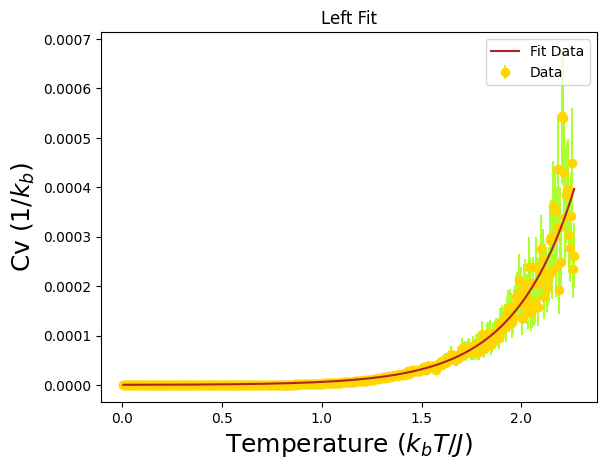

In [117]:
true_tc = 2.269

difference_array = np.absolute(em["Temp"]-true_tc)
 
# find the index of minimum element from the array
index = difference_array.argmin()

# Left Fit



popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_cv(em)[0:index], p0=(1.0, 1))
plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data",color = "firebrick", zorder = 2)
plt.errorbar(em["Temp"][0:index], get_cv(em)[0:index], yerr = error(get_cv(em)[0:index]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.plot(em["Temp"][0:index], get_cv(em)[0:index], label= "Actual Data")
#plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
#plt.legend()


#plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data", color = "firebrick", zorder = 2)
#plt.errorbar(em["Temp"][index:], get_cv(em)[index:], yerr = error(get_cv(em)[index:]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.scatter(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data", color = )

plt.xlabel("Temperature ($k_bT/J$)", fontsize=18)
plt.ylabel("Cv ($1/k_b$)", fontsize=18)
plt.title("Below Tc")
plt.legend()
plt.show()


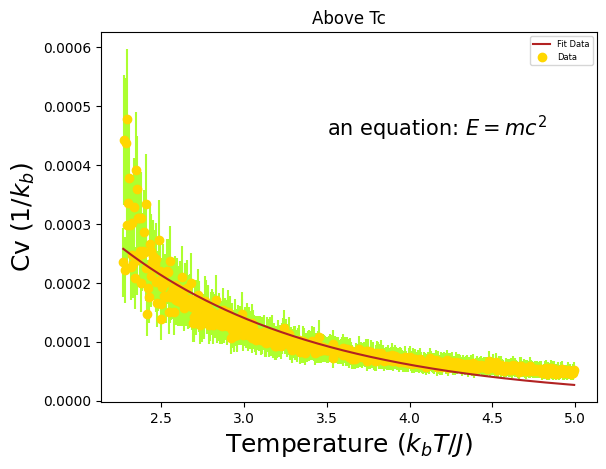

In [134]:
# Right Fit
#fig = plt.figure()
#ax = fig.add_subplot()
popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_cv(em)[index:], p0=(1.0, 1))
plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data", color = "firebrick", zorder = 2)
plt.errorbar(em["Temp"][index:], get_cv(em)[index:], yerr = error(get_cv(em)[index:]),fmt="o",ecolor = "greenyellow", color = "gold", label= "Data",zorder=-1)
#plt.scatter(em["Temp"][index:], get_cv(em)[index:], label= "Actual Data", color = )
#plt.axis([0, 10, 0, 10])
plt.text(3.5, 0.00045, r' $\chi^2=$', fontsize=15)
plt.xlabel("Temperature ($k_bT/J$)", fontsize=18)
plt.ylabel("Cv ($1/k_b$)", fontsize=18)
plt.legend(prop={'size': 6})
plt.title("Above Tc")
plt.show()


In [120]:
pcov_r

array([[ 6.92451938e-04, -2.31917816e-06],
       [-2.31917816e-06,  8.03735693e-09]])

In [137]:
np.trace(np.sqrt(pcov_r))

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_20084/2545936990.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.trace(np.sqrt(pcov_r))


0.026404132827037755

In [119]:
 for i in range(len(em["Temp"][index:])):
    
(exponential_decay(em["Temp"][index:], *popt_r) - em["Temp"][index:])**2/sum(np.sqrtpcov_r[0])

453     5.151730
454     5.174457
455     5.197235
456     5.220062
457     5.242939
         ...    
994    24.750355
995    24.800131
996    24.849957
997    24.899832
998    24.949758
Name: Temp, Length: 546, dtype: float64

In [84]:
index

452

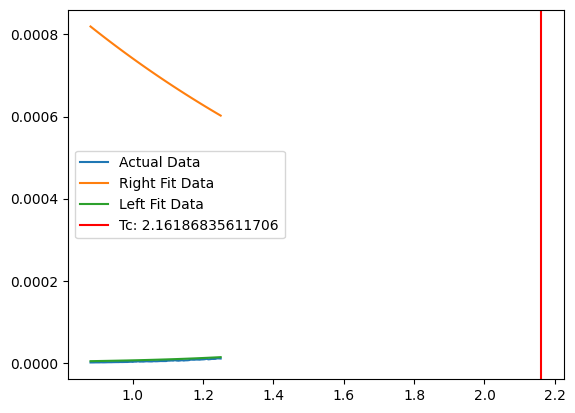

In [85]:
min_cutoff = 175
max_cutoff = 250

plt.plot(em["Temp"][min_cutoff:max_cutoff], get_cv(em[min_cutoff:max_cutoff]), label= "Actual Data")
plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_decay(em["Temp"][min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_growth(em["Temp"][min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()


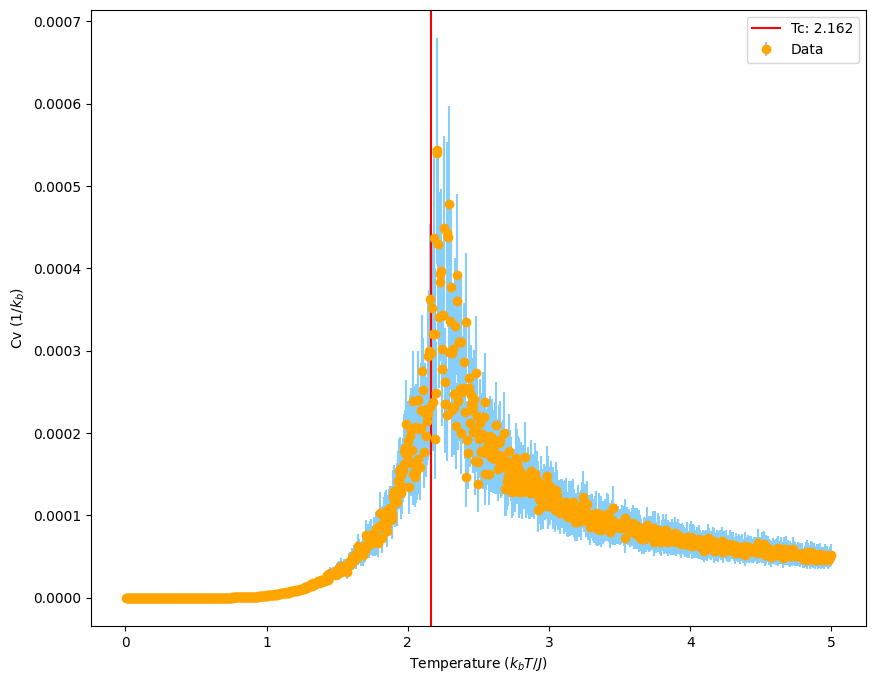

In [93]:
#Overlay Fits
# Add Tc Error! + chi squared

fig = plt.figure(figsize= (10, 8))
plt.errorbar(em["Temp"], get_cv(em), yerr = error(get_cv(em)),fmt="o",ecolor = "lightskyblue", color = "orange", label= "Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], get_cv(em[min_cutoff:max_cutoff]), label= "Actual Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_decay(em["Temp"][min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
#plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_growth(em["Temp"][min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {0:.3f}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()
plt.xlabel("Temperature ($k_bT/J$)")
plt.ylabel("Cv ($1/k_b$)")
plt.legend()
plt.show()

In [113]:
(2.269 - 2.162)/2.269

0.04715733803437647

# Magnetization

Text(0, 0.5, 'Aveage Site Magnetization')

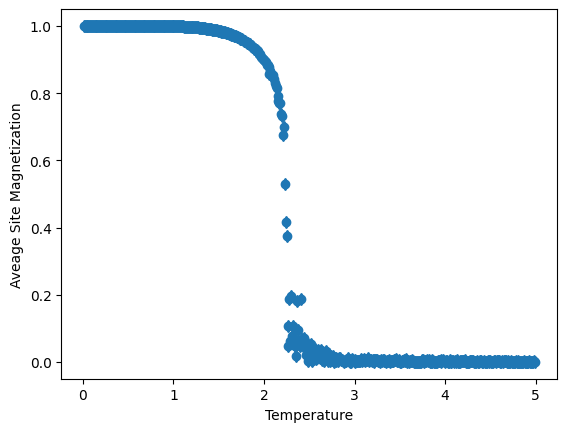

In [55]:
#plt.plot(em["Temp"], em["M_mean"])
plt.errorbar(em["Temp"], np.absolute(em["M_mean"]), yerr=em["M_std"], uplims=True, lolims=True,fmt='o')
plt.xlabel('Temperature')
plt.ylabel('Aveage Site Magnetization')

In [56]:
def sigmoid(x, a, b, c):
    return  a - a / (1 + np.exp(-b * (x - c)))

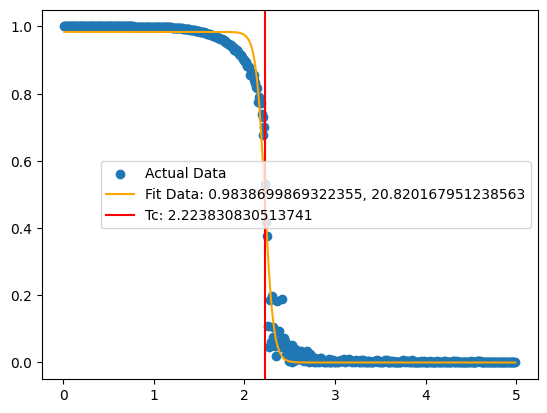

In [57]:
popt_l, pcov_l = curve_fit(sigmoid, em["Temp"], np.absolute(em["M_mean"]), p0=(1.0, 1,1))

plt.scatter(em["Temp"], np.absolute(em["M_mean"]), label= "Actual Data")
plt.plot(em["Temp"], sigmoid(em["Temp"], *popt_l), label= "Fit Data: {}, {}".format(*popt_l), color= "orange")
plt.axvline(popt_l[2], label = "Tc: {}".format(popt_l[2]), color = "r")
plt.legend()


## Magnetic Susceptibility

$\chi = \beta Var(M)$

set $\beta = 1$

$\chi = Var(M)$

In [58]:
def get_ms(data):

    ms = data["M_std"]**2
    return ms

Text(0.5, 1.0, 'Magnetic Susceptibility Plots')

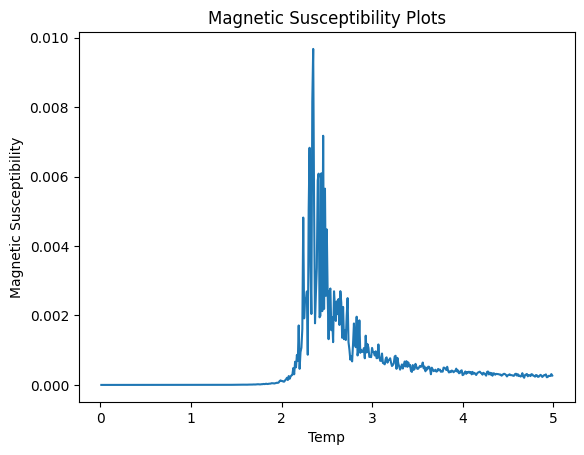

In [59]:
plt.plot(em["Temp"], get_ms(em))
plt.xlabel("Temp")
plt.ylabel("Magnetic Susceptibility")
plt.title("Magnetic Susceptibility Plots")

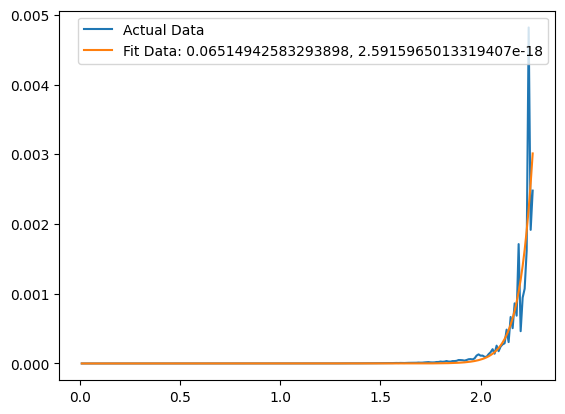

In [60]:
popt_l, pcov_l = curve_fit(exponential_growth, em["Temp"][0:index], get_ms(em)[0:index], p0=(1.0, 1))

plt.plot(em["Temp"][0:index], get_ms(em)[0:index], label= "Actual Data")
plt.plot(em["Temp"][0:index], exponential_growth(em["Temp"][0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
plt.legend()


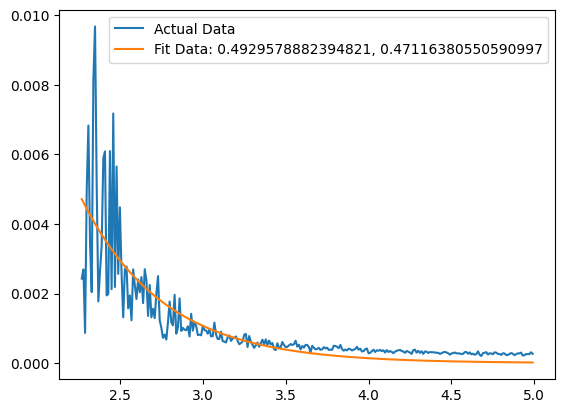

In [61]:
# Right Fit

popt_r, pcov_r = curve_fit(exponential_decay, em["Temp"][index:], get_ms(em)[index:], p0=(1.0, 1))

plt.plot(em["Temp"][index:], get_ms(em)[index:], label= "Actual Data")
plt.plot(em["Temp"][index:], exponential_decay(em["Temp"][index:], *popt_r), label= "Fit Data: {}, {}".format(*popt_r))
plt.legend()

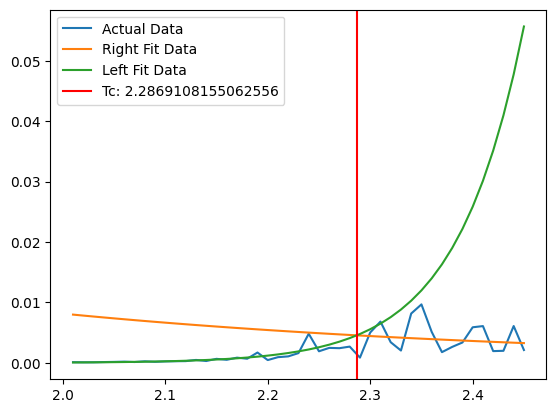

In [67]:
min_cutoff = 200
max_cutoff = 245

plt.plot(em["Temp"][min_cutoff:max_cutoff], get_ms(em[min_cutoff:max_cutoff]), label= "Actual Data")
plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_decay(em["Temp"][min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
plt.plot(em["Temp"][min_cutoff:max_cutoff], exponential_growth(em["Temp"][min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()




## Correlation Length

In [2]:
import pandas as pd

N,n_steps,n_analyze,flip_perc
100,150000,5000,0.1

In [18]:
sc = pd.read_csv("best_large_run/0.00T5.00_SC_v0.csv", index_col = "Temp")
sc = sc.iloc[:, :-1]

In [19]:
sc.shape

(1000, 49)

In [20]:
sc

,d=1,d=2,d=3,d=4,d=5,d=6,d=7,d=8,d=9,d=10,...,d=40,d=41,d=42,d=43,d=44,d=45,d=46,d=47,d=48,d=49
Temp,,,,,,,,,,,,,,,,,,,,,
0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.975,0.001677,0.000258,0.000090,-0.000151,-0.000126,-0.000301,-0.000230,-0.000095,-0.000103,-0.000077,...,-0.000292,-0.000281,-0.000230,-0.000098,0.000003,-0.000132,-0.000104,-0.000117,-0.000223,-0.000112
4.980,0.001803,0.000283,-0.000119,-0.000022,-0.000098,-0.000281,-0.000291,-0.000103,-0.000210,-0.000089,...,-0.000235,-0.000143,-0.000236,-0.000105,-0.000250,-0.000162,-0.000169,-0.000139,-0.000253,-0.000181
4.985,0.001690,0.000246,0.000005,-0.000089,-0.000183,-0.000191,-0.000212,-0.000244,-0.000009,-0.000042,...,-0.000195,-0.000134,-0.000105,-0.000185,-0.000084,-0.000067,0.000082,0.000007,-0.000269,-0.000123


In [73]:


# Exponential decay function
def exponential_decay(x, k):
    return np.exp(-x / k)

In [11]:
def cor_len(data):
    T =data.shape[0]
    Ks = []
    for i in range(T):
        
        popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )
        Ks.append(popt[0])
    return data.index, Ks

        

    

In [21]:
i= 5
curve_fit(exponential_decay, [i+1 for i in range(sc.shape[1])], sc.iloc[i], p0=(10), maxfev= 2000)

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_20084/3162175374.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  curve_fit(exponential_decay, [i+1 for i in range(sc.shape[1])], sc.iloc[i], p0=(10), maxfev= 2000)


(array([0.00136163]), array([[inf]]))

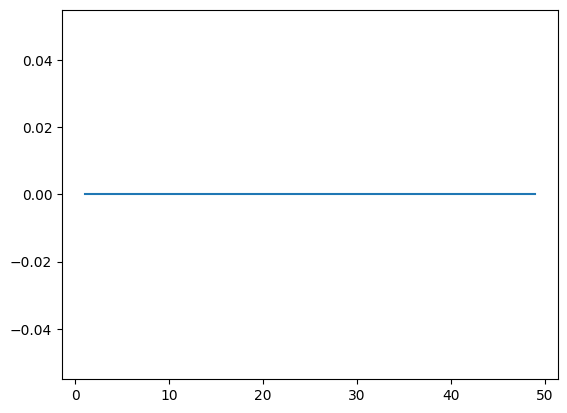

In [22]:
plt.plot([i+1 for i in range(sc.shape[1])], sc.iloc[i])

In [23]:
T, k= cor_len(sc)

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_20084/3651670814.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )


In [24]:
T

Float64Index([               0.0,              0.005,               0.01,
                           0.015,               0.02,              0.025,
                            0.03,              0.035,               0.04,
                           0.045,
              ...
              4.9499999999999655,  4.954999999999965,  4.959999999999965,
               4.964999999999965,  4.969999999999965,  4.974999999999965,
               4.979999999999965,  4.984999999999965,  4.989999999999965,
               4.994999999999965],
             dtype='float64', name='Temp', length=1000)

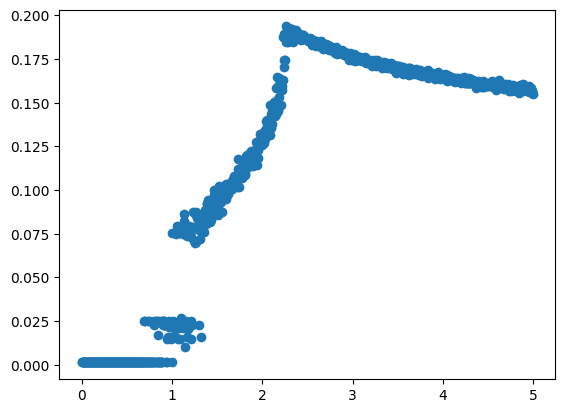

In [25]:
plt.scatter(T, k)

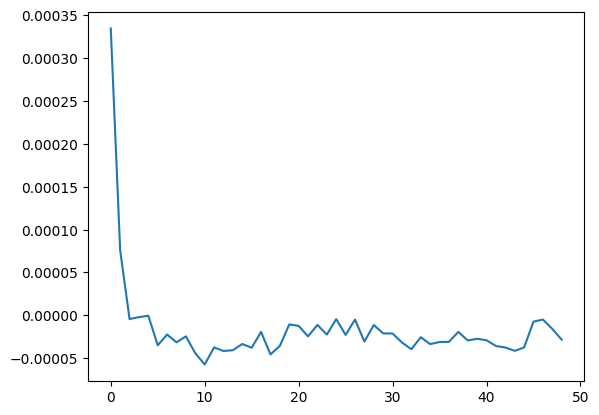

In [165]:
i = 200
plt.plot([i for i in range(sc.shape[1])], sc.iloc[i])

Text(0.5, 1.0, 'Correlation Length Plots')

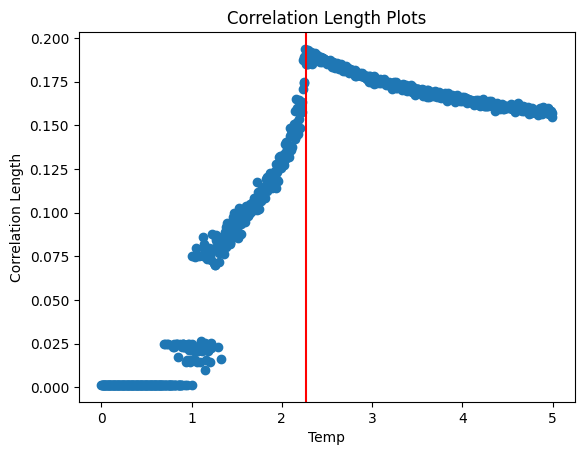

In [27]:
plt.scatter(T,k)
plt.xlabel("Temp")
plt.axvline(2.269, color = "r")
plt.ylabel("Correlation Length")
plt.title("Correlation Length Plots")

In [28]:
T[np.argmax(k)]

2.259999999999988

In [29]:
popt_l, pcov_l = curve_fit(exponential_growth, sc.index[0:index], cor_len(sc)[0:index], p0=(1.0, 1))

plt.plot(sc.index[0:index], cor_len(sc)[0:index], label= "Actual Data")
plt.plot(sc.index[0:index], exponential_growth(sc.index[0:index], *popt_l), label= "Fit Data: {}, {}".format(*popt_l))
plt.legend()


NameError: name 'exponential_growth' is not defined

In [196]:
# Right Fit

popt_r, pcov_r = curve_fit(exponential_decay, sc.index[index:], cor_len(sc)[index:], p0=(1.0, 1))

plt.plot(sc.index[index:], cor_len(sc)[index:], label= "Actual Data")
plt.plot(sc.index[index:], exponential_decay(sc.index[index:], *popt_r), label= "Fit Data: {}, {}".format(*popt_r))
plt.legend()

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_6045/3651670814.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )


ValueError: `ydata` must not be empty!

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_6045/3651670814.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )


ValueError: x and y must have same first dimension, but have shapes (150,) and (2, 500)

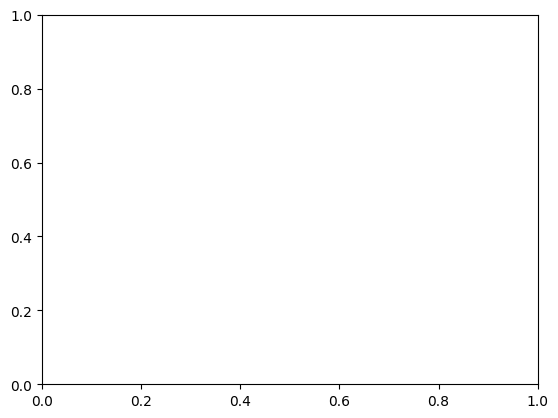

In [197]:
min_cutoff = 0
max_cutoff = 150

plt.plot(sc.index[min_cutoff:max_cutoff], cor_len(sc)[min_cutoff:max_cutoff], label= "Actual Data")
plt.plot(sc.index[min_cutoff:max_cutoff], exponential_decay(sc.index[min_cutoff:max_cutoff], *popt_r), label= "Right Fit Data")
plt.plot(sc.index[min_cutoff:max_cutoff], exponential_growth(sc.index[min_cutoff:max_cutoff], *popt_l), label= "Left Fit Data")
plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
plt.legend()


# plt.plot(sc.index[30:90], cor_len(sc)[30:90], label= "Actual Data")
# plt.plot(sc.index[30:90], exponential_decay(sc.index[30:90], *popt_r), label= "Right Fit Data")
# plt.plot(sc.index[30:90], exponential_growth(sc.index[30:90], *popt_l), label= "Left Fit Data")
# plt.axvline((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0]), color ="r", label= "Tc: {}".format((- np.log(popt_l[1]) +  np.log(popt_r[1]))/(1/popt_l[0] + 1/popt_r[0])))
# plt.legend()